In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
airbnb_cr = pd.read_csv('/home/novais/Downloads/dados/airbnb_cr.csv')
crimes = pd.read_csv('/home/novais/Downloads/dados/crimes.csv')
homicides = pd.read_csv('/home/novais/Downloads/dados/homicides.csv')
listings = pd.read_csv('/home/novais/Downloads/dados/listings.csv')
stealing = pd.read_csv('/home/novais/Downloads/dados/stealing.csv')
violence = pd.read_csv('/home/novais/Downloads/dados/violence.csv')

In [6]:
listings.head()

,Unnamed: 0,listing_id,host_id,neighbourhood,latitude,longitude,room_type,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,lr_m,lr_d,lr_y,lat,lon,location,loc,loc_id,loc_id2
0,0,2384,2613,Hyde Park,41.78886,-87.58671,2,159,2.89,1,306,7,11,2019,41.79,-87.59,"(41.78886, -87.58671)","(41.79, -87.59)",124,71
1,1,2604454,13339125,Hyde Park,41.78977,-87.58916,1,85,1.42,3,41,7,11,2019,41.79,-87.59,"(41.789770000000004, -87.58915999999999)","(41.79, -87.59)",124,71
2,2,6524346,34121377,Hyde Park,41.79119,-87.59099,2,26,0.52,1,34,7,7,2019,41.79,-87.59,"(41.79119, -87.59099)","(41.79, -87.59)",124,71
3,3,18549719,47172572,Hyde Park,41.79296,-87.59275,1,127,4.77,60,96,7,2,2019,41.79,-87.59,"(41.79296, -87.59275)","(41.79, -87.59)",124,71
4,4,22320506,47172572,Hyde Park,41.79386,-87.59469,1,99,5.32,60,93,7,8,2019,41.79,-87.59,"(41.793859999999995, -87.59469)","(41.79, -87.59)",124,71


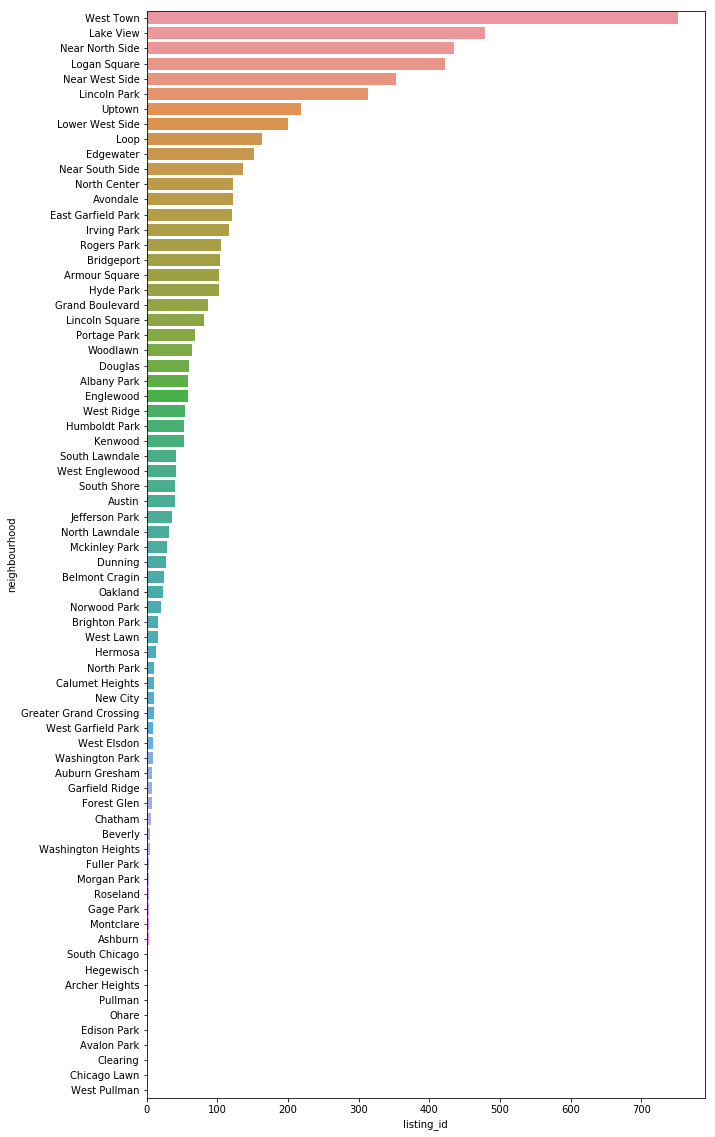

In [78]:
l=listings.groupby(['neighbourhood']).count()
l=l.reset_index()
l=l.sort_values(by='listing_id',ascending=False)
g = sns.barplot(l.listing_id,l.neighbourhood)

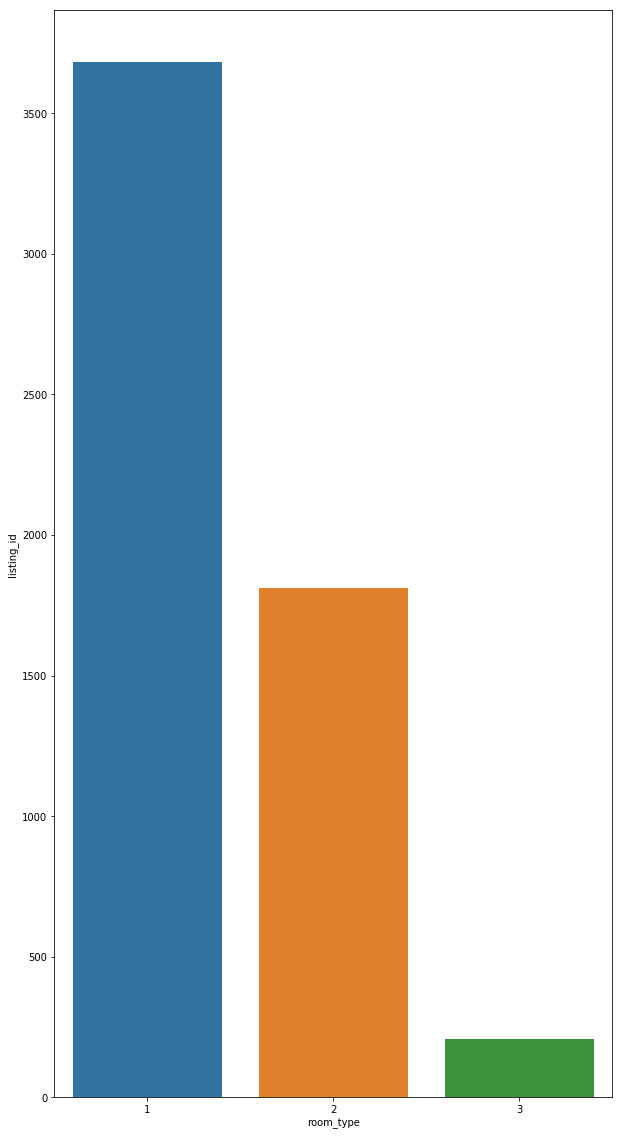

In [80]:
l=listings.groupby(['room_type']).count()
l=l.reset_index()
l=l.sort_values(by='listing_id')
sns.barplot(l.room_type,l.listing_id)

([<matplotlib.axis.XTick at 0x7f7acf812208>,
 <a list of 12 Text xticklabel objects>)

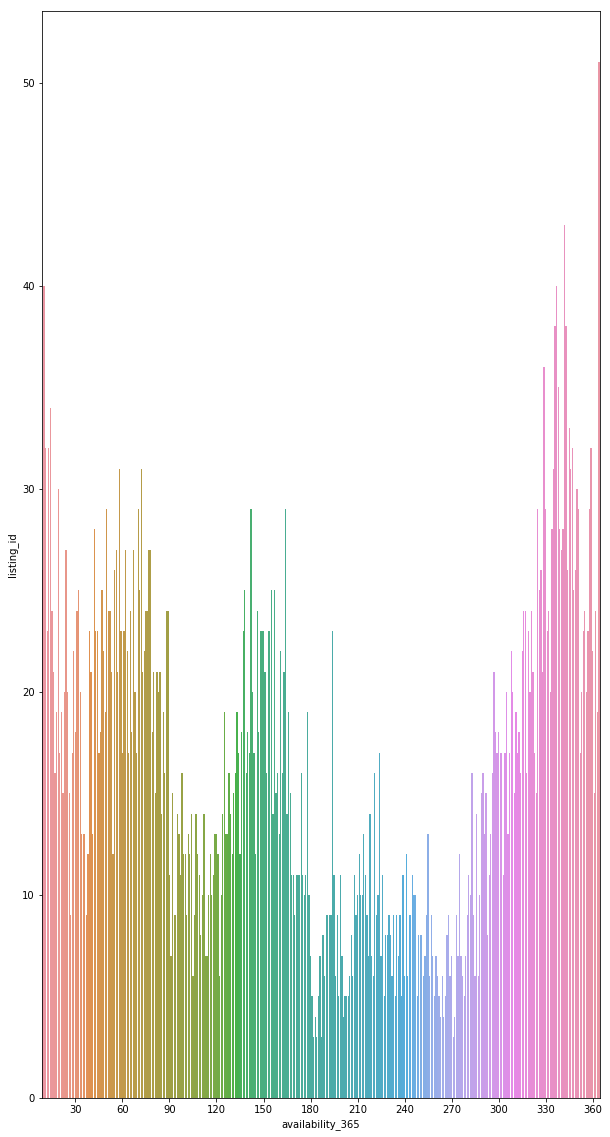

In [68]:
l=listings.groupby(['availability_365']).count()
l=l.reset_index()
l=l.sort_values(by='listing_id')
fig, ax = plt.subplots()
sns.barplot(l.availability_365,l.listing_id)
plt.xticks([21,51,81,111,141,171,201,231,261,291,321,351],[30,60,90,120,150,180,210,240,270,300,330,360])

([<matplotlib.axis.XTick at 0x7f7acdd2e518>,
 <a list of 12 Text xticklabel objects>)

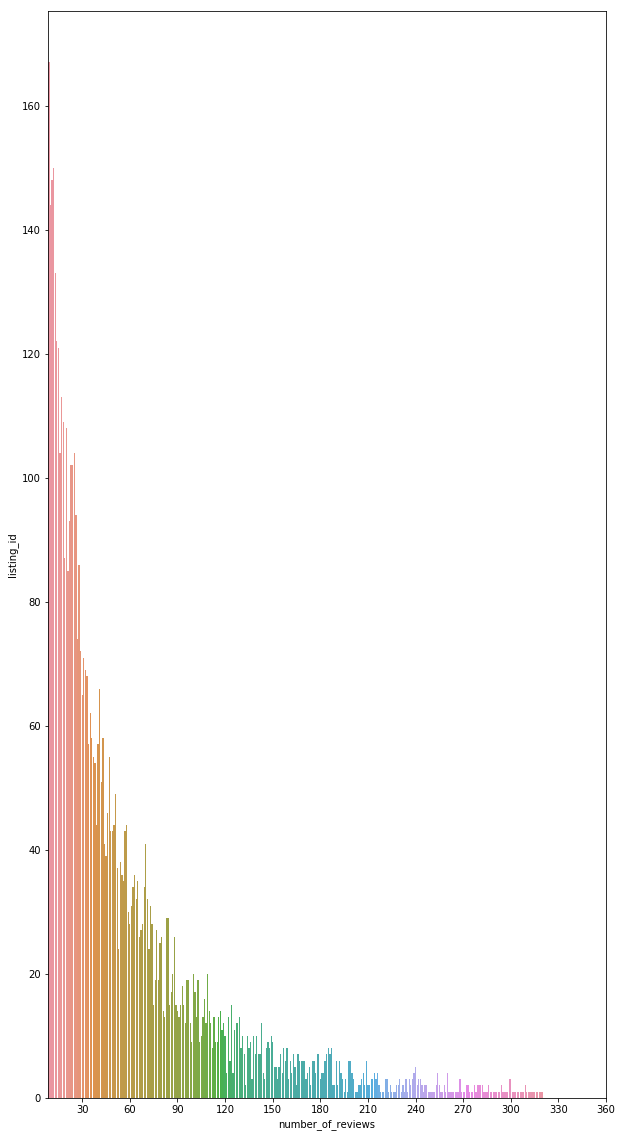

In [87]:
l=listings.groupby(['number_of_reviews']).count()
l=l.reset_index()
l=l.sort_values(by='listing_id',ascending=False)
fig, ax = plt.subplots()
g = sns.barplot(l.number_of_reviews,l.listing_id)
plt.xticks([21,51,81,111,141,171,201,231,261,291,321,351],[30,60,90,120,150,180,210,240,270,300,330,360])

In [89]:
crimes = pd.read_csv('/home/novais/Downloads/crimes.csv')
crimes.head()

,Unnamed: 0,date,latitude,longitude,arrest,desc,lat,lon,location,loc,loc_id,month,day,year
0,0,2018-07-09,41.894328,-87.628143,1,BATTERY,41.89,-87.63,"(41.894327845999996, -87.62814321)","(41.89, -87.63)",0,7,9,2018
1,462,2018-07-09,41.906323,-87.767016,0,BATTERY,41.91,-87.77,"(41.906323375, -87.76701638799999)","(41.91, -87.77)",6280,7,9,2018
2,463,2018-07-09,41.762420,-87.683181,0,BATTERY,41.76,-87.68,"(41.762419957, -87.68318080799999)","(41.76, -87.68)",6039,7,9,2018
3,464,2018-07-09,41.794497,-87.647608,1,CRIMINAL DAMAGE,41.79,-87.65,"(41.794496999, -87.647607611)","(41.79, -87.65)",6105,7,9,2018
4,465,2018-07-09,41.903997,-87.643230,1,CRIMINAL DAMAGE,41.90,-87.64,"(41.903996883000005, -87.64323023799999)","(41.9, -87.64)",6274,7,9,2018


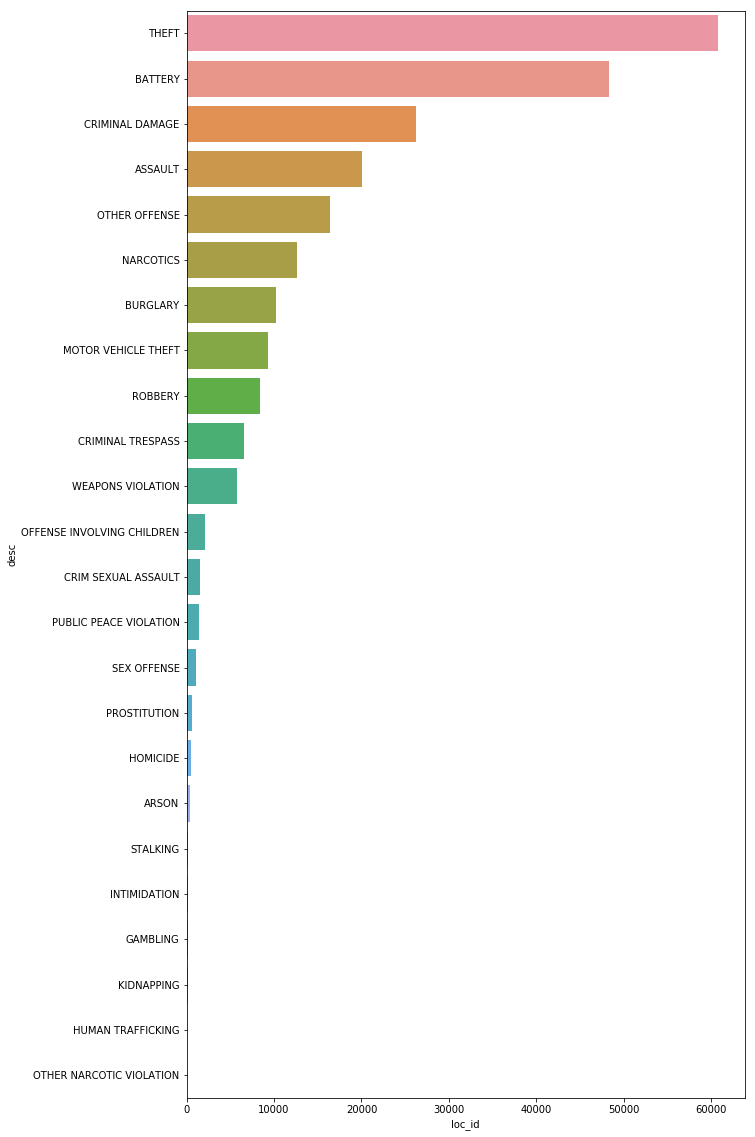

In [93]:
l=crimes.groupby(['desc']).count()
l=l.reset_index()
l=l.sort_values(by='loc_id',ascending=False)
fig, ax = plt.subplots()
g = sns.barplot(l.loc_id,l.desc)

In [94]:
crimes['Description']='Others'
crimes.loc[crimes.desc=="HOMICIDE",'Description']='Homicide'
crimes.loc[crimes.desc.isin(["BURGLARY", "THEFT", "ROBBERY", "MOTOR VEHICLE THEFT"]),'Description']="Stealing"
crimes.loc[crimes.desc.isin(["BATTERY", "ASSAULT"]),'Description']="Aggression"

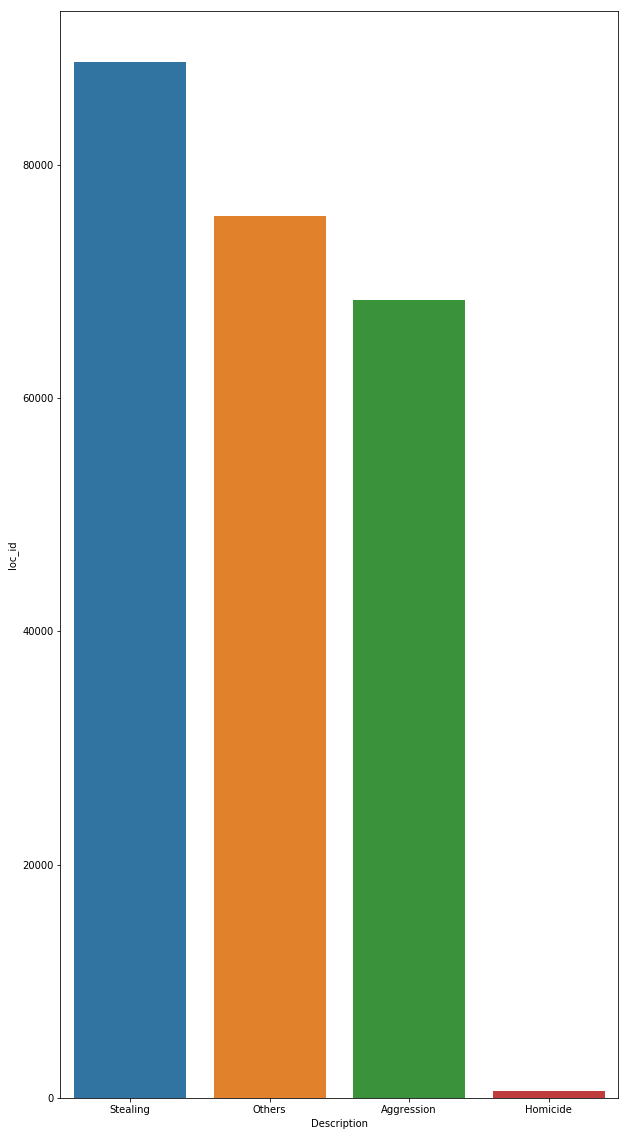

In [97]:
l=crimes.groupby(['Description']).count()
l=l.reset_index()
l=l.sort_values(by='loc_id',ascending=False)
fig, ax = plt.subplots()
g = sns.barplot(l.Description,l.loc_id)

In [98]:
homicides.head()

,Unnamed: 0,date,latitude,longitude,arrest,lat,lon,location,loc,loc_id,month,day,year,homi_loc_id2
0,0,2018-07-09,41.780033,-87.622046,1,41.78,-87.62,"(41.780032862, -87.622045795)","(41.78, -87.62)",6088,7,9,2018,108
1,1,2018-10-10,41.780171,-87.619599,0,41.78,-87.62,"(41.780171366, -87.61959879)","(41.78, -87.62)",6088,10,10,2018,108
2,2,2019-02-03,41.784611,-87.622204,0,41.78,-87.62,"(41.784611315999996, -87.62220419100001)","(41.78, -87.62)",6088,2,3,2019,108
3,3,2019-03-18,41.784728,-87.618969,1,41.78,-87.62,"(41.784728458000004, -87.618968921)","(41.78, -87.62)",6088,3,18,2019,108
4,4,2019-04-03,41.783210,-87.615697,0,41.78,-87.62,"(41.783209684, -87.61569688200001)","(41.78, -87.62)",6088,4,3,2019,108


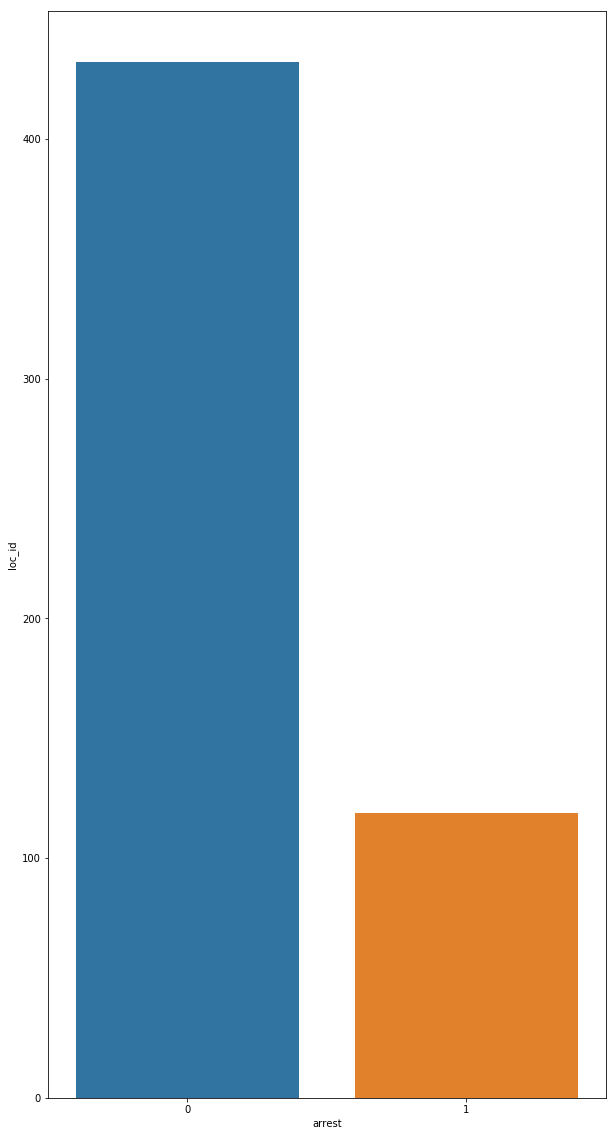

In [101]:
l=homicides.groupby(['arrest']).count()
l=l.reset_index()
l=l.sort_values(by='loc_id',ascending=False)
fig, ax = plt.subplots()
g = sns.barplot(l.arrest,l.loc_id)

In [102]:
stealing.head()

,Unnamed: 0,date,latitude,longitude,arrest,lat,lon,location,loc,loc_id,month,day,year,stea_loc_id2
0,0,2018-07-09,41.937721,-87.640515,1,41.94,-87.64,"(41.937720768, -87.640514509)","(41.94, -87.64)",6351,7,9,2018,477
1,1,2018-07-09,41.938714,-87.642709,0,41.94,-87.64,"(41.938713675, -87.64270903100001)","(41.94, -87.64)",6351,7,9,2018,477
2,2,2018-07-09,41.936046,-87.636780,0,41.94,-87.64,"(41.936046155, -87.636780157)","(41.94, -87.64)",6351,7,9,2018,477
3,3,2018-07-09,41.935581,-87.640648,0,41.94,-87.64,"(41.935581084, -87.640647925)","(41.94, -87.64)",6351,7,9,2018,477
4,4,2018-07-10,41.938747,-87.640548,0,41.94,-87.64,"(41.938747304, -87.640547502)","(41.94, -87.64)",6351,7,10,2018,477


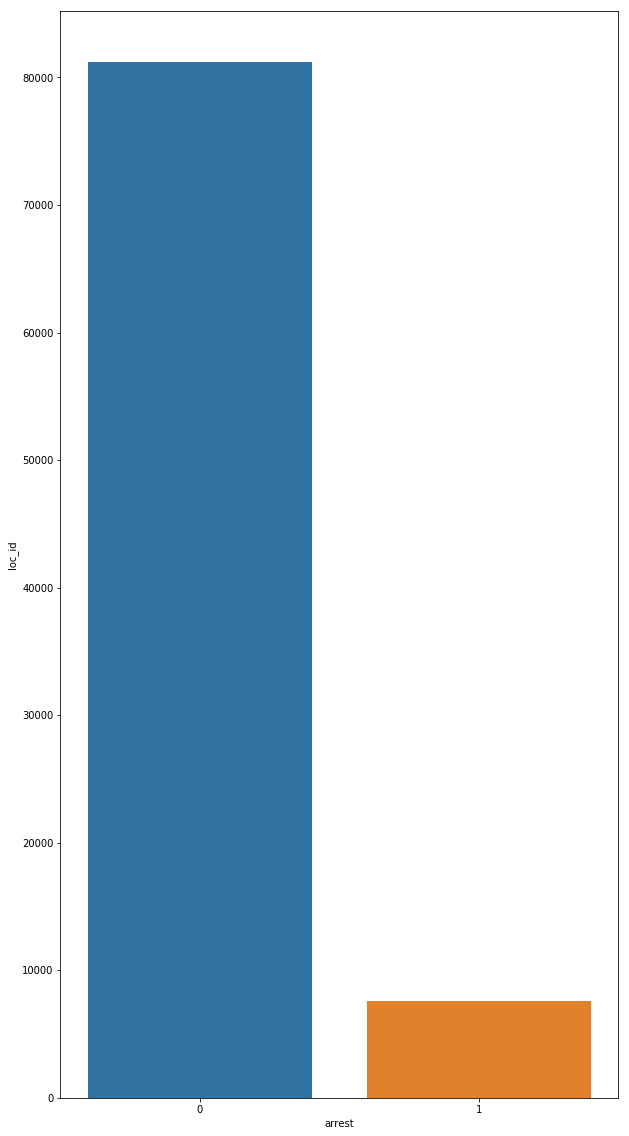

In [103]:
l=stealing.groupby(['arrest']).count()
l=l.reset_index()
l=l.sort_values(by='loc_id',ascending=False)
fig, ax = plt.subplots()
g = sns.barplot(l.arrest,l.loc_id)

In [104]:
violence.head()

,Unnamed: 0,date,latitude,longitude,arrest,lat,lon,location,loc,loc_id,month,day,year,viol_loc_id2
0,0,2018-07-09,41.894328,-87.628143,1,41.89,-87.63,"(41.894327845999996, -87.62814321)","(41.89, -87.63)",0,7,9,2018,0
1,1,2018-07-09,41.894265,-87.632665,0,41.89,-87.63,"(41.894264966, -87.63266524)","(41.89, -87.63)",0,7,9,2018,0
2,2,2018-07-10,41.886815,-87.628362,0,41.89,-87.63,"(41.886815464, -87.628361716)","(41.89, -87.63)",0,7,10,2018,0
3,3,2018-07-11,41.886817,-87.629059,0,41.89,-87.63,"(41.886817001, -87.629059469)","(41.89, -87.63)",0,7,11,2018,0
4,4,2018-07-11,41.885369,-87.632432,0,41.89,-87.63,"(41.885369466, -87.63243193)","(41.89, -87.63)",0,7,11,2018,0


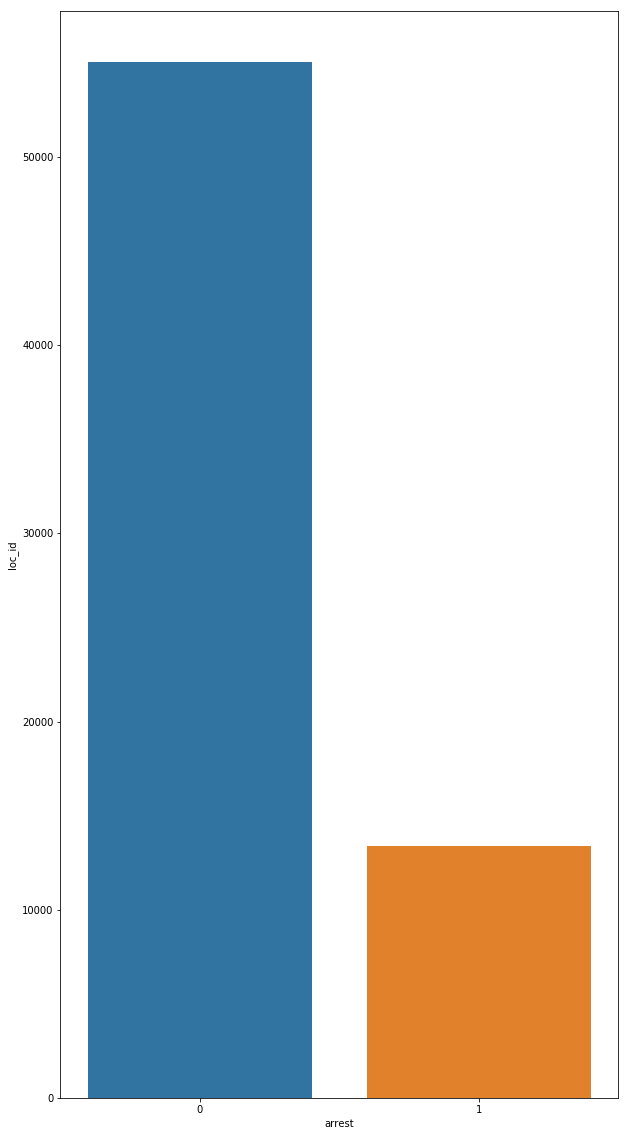

In [105]:
l=violence.groupby(['arrest']).count()
l=l.reset_index()
l=l.sort_values(by='loc_id',ascending=False)
fig, ax = plt.subplots()
g = sns.barplot(l.arrest,l.loc_id)

In [106]:
airbnb_cr.head()

,Unnamed: 0,listing_id,date,price,month,day,year,host_id,neighbourhood,latitude,...,crimes_5km_count,homicides_1km_count,homicides_2km_count,homicides_5km_count,stealing_1km_count,stealing_2km_count,stealing_5km_count,violence_1km_count,violence_2km_count,violence_5km_count
0,0,2384,2018-07-26,75.0,7,26,2018,2613,Hyde Park,41.78886,...,89,0,0,0,1,2,15,0,2,11
1,268,2384,2018-07-29,69.0,7,29,2018,2613,Hyde Park,41.78886,...,76,0,0,0,0,5,14,0,5,16
2,847,2384,2018-08-05,65.0,8,5,2018,2613,Hyde Park,41.78886,...,94,0,0,2,0,3,11,2,5,14
3,1343,2384,2018-10-01,65.0,10,1,2018,2613,Hyde Park,41.78886,...,86,0,0,0,1,5,7,1,5,17
4,1793,2384,2018-10-31,75.0,10,31,2018,2613,Hyde Park,41.78886,...,81,0,0,0,0,7,15,0,1,17
